Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT








### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.



In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = lastday_filtered.tail(1)

pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


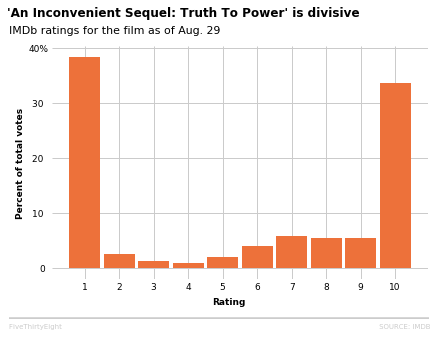

In [0]:
fig, ax = plt.subplots()
# fig.suptitle('Test Title')

# Figure background color
fig.patch.set(facecolor='white')

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor='white')

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12, x=0.35, y=1.1, fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=11, x=-1.2, y=42.7)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9, fontweight='bold')
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold')

# Fix the x and y axis tick marks and grid
ax.tick_params(axis='both', which='major', labelsize=9, color='grey',pad=3)
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(['0 ','10  ','20  ','30  ','40%'])
ax.set_yticks(range(0,50,10))

# Change position of x-axis label
ax.xaxis.set_label_coords(0.47, -0.08)

# Add extra horizontal line by extending vertical axis
ax.set_ylim(bottom=-2, top=40.4)

# Remove spines
for side in ['top', 'bottom', 'left', 'right']:
  ax.spines[side].set_visible(False)

# Add signature bar and signature
ax.text(x = -1.2, y = -8.5,
        s = '____________________________________________________________',
        color = 'grey', alpha = .4, fontweight='bold');
ax.text(x = -1.2, y = -11,
        s = 'FiveThirtyEight                                                  '+
        '                                                                     '+
        '                      SOURCE: IMDB',
        color = 'grey', alpha = .4, fontsize=7);

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

f45cca

In [0]:
scrabble_data_url = 'https://media.githubusercontent.com/media/fivethirtyeight/data/master/scrabble-games/scrabble_games.csv'

df = pd.read_csv(scrabble_data_url)

df.shape

(1542642, 19)

In [0]:
# We only care about the winning and losing scores, so I remove the rest of the
# data.
df = df[['winnerscore','loserscore']]
df.tail()

# There are many entries where both the winner and loser score are 0, so I only
# consider games where both scores are greather than 0. Then a game has actually
# been played.
condition = (df['winnerscore'] > 0) & (df['loserscore'] > 0)
df_scores = df[condition]
print(df_scores.shape)
df_scores.head()

(770653, 2)


,winnerscore,loserscore
2719,521,237
2720,488,262
2721,465,330
2722,467,304
2723,404,292


In [0]:
fig, ax = plt.subplots()
# fig.suptitle('Test Title')

# Figure background color
fig.patch.set(facecolor='white')

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor='white')

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12, x=0.35, y=1.1, fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=11, x=-1.2, y=42.7)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9, fontweight='bold')
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold')

# Fix the x and y axis tick marks and grid
ax.tick_params(axis='both', which='major', labelsize=9, color='grey',pad=3)
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(['0 ','10  ','20  ','30  ','40%'])
ax.set_yticks(range(0,50,10))

# Change position of x-axis label
ax.xaxis.set_label_coords(0.47, -0.08)

# Add extra horizontal line by extending vertical axis
ax.set_ylim(bottom=-2, top=40.4)

# Remove spines
for side in ['top', 'bottom', 'left', 'right']:
  ax.spines[side].set_visible(False)

# Add signature bar and signature
ax.text(x = -1.2, y = -8.5,
        s = '____________________________________________________________',
        color = 'grey', alpha = .4, fontweight='bold');
ax.text(x = -1.2, y = -11,
        s = 'FiveThirtyEight                                                  '+
        '                                                                     '+
        '                      SOURCE: IMDB',
        color = 'grey', alpha = .4, fontsize=7);

In [0]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/04/roeder-scrabble-1.png'
example = Image(url=url, width=575)

display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here